In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [109]:
coordinates_path = "../main/resources/experiment_data/positions_1.csv"
rewards_path = "../main/resources/experiment_data/rewards_1.csv"

In [110]:
df_coordinates = pd.read_csv(coordinates_path)
df_coordinates.head()

,Unnamed: 0,elapsed_time,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,...,x_5,y_5,x_6,y_6,x_7,y_7,x_8,y_8,x_9,y_9
0,0,28.865302,115.482490,196.393431,58.462345,20.247967,170.268265,88.421142,173.528735,249.000000,...,143.104497,161.965534,5.387790,148.314425,61.540386,93.367142,213.182142,121.990165,20.415471,28.875026
1,1,43.765845,117.901681,196.125345,61.581559,20.609427,174.882499,88.611737,173.590003,248.992398,...,144.597812,162.302631,5.416841,148.313351,61.676937,93.358880,215.764402,121.649928,24.121231,29.340196
2,2,57.807750,118.206370,196.131232,65.135952,21.048489,177.828027,87.697154,174.013641,248.993682,...,147.776687,162.694359,5.810838,148.271440,64.194144,92.531517,218.774122,121.939822,24.878660,29.357214
3,3,72.393872,119.648293,196.133855,66.103154,20.725243,178.853165,87.496044,175.262699,249.000000,...,148.190862,162.624071,7.507862,148.022699,65.944319,91.910088,220.477739,121.345723,25.371173,29.271912
4,4,87.295808,119.999128,195.914463,66.206969,20.699950,180.799367,86.758869,177.313068,248.516627,...,149.264751,162.234722,7.931523,147.797207,68.746289,91.510975,221.451112,121.346255,27.953245,28.487459


In [111]:
len(df_coordinates)

2833

In [112]:
df_rewards = pd.read_csv(rewards_path)
df_rewards.head()

,Unnamed: 0,elapsed_time,r_0,r_1,r_2,r_3,r_4,r_5,r_6,r_7,r_8,r_9
0,0,28.865302,-126.875102,-114.385376,-169.692481,-333.526018,-233.021038,-873.124898,-566.633112,-748.259659,-830.307519,-885.614624
1,1,43.765845,-120.208968,-111.993232,-165.870595,-332.033623,-226.227405,-879.791032,-556.284836,-750.493098,-834.129405,-888.006768
2,2,57.807750,-132.578975,-123.400270,-174.542596,-330.343171,-231.953215,-867.421025,-556.671500,-754.067885,-825.457404,-876.599730
3,3,72.393872,-132.991421,-125.336224,-171.713157,-330.674837,-230.395748,-867.008579,-557.775977,-755.260622,-828.286843,-874.663776
4,4,87.295808,-133.952843,-115.228989,-173.392456,-330.267755,-230.502485,-866.047157,-558.091281,-757.195271,-826.607544,-884.771011


In [113]:
len(df_rewards)

2833

In [114]:
x_coord = [col for col in df_coordinates.columns if col.startswith("x")]
y_coord = [col for col in df_coordinates.columns if col.startswith("y")]

In [115]:
reward_cols = [col for col in df_rewards.columns if col.startswith("r")]

In [116]:
reward_cols

['r_0', 'r_1', 'r_2', 'r_3', 'r_4', 'r_5', 'r_6', 'r_7', 'r_8', 'r_9']

In [117]:
import numpy as np

blue_cmap = plt.cm.Blues
red_cmap = plt.cm.Reds

/tmp/ipykernel_3049332/868544746.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x_pred[i] + 0.1, y_pred[i], round((r_pred[i] + 1000), 2), fontsize=12)  # Offset x[i] for better readability
/tmp/ipykernel_3049332/868544746.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x_prey[i] + 0.1, y_prey[i], round((r_prey[i] + 1000), 2), fontsize=12)  # Offset x[i] for better readability
/tmp/ipykernel_3049332/868544746.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavi

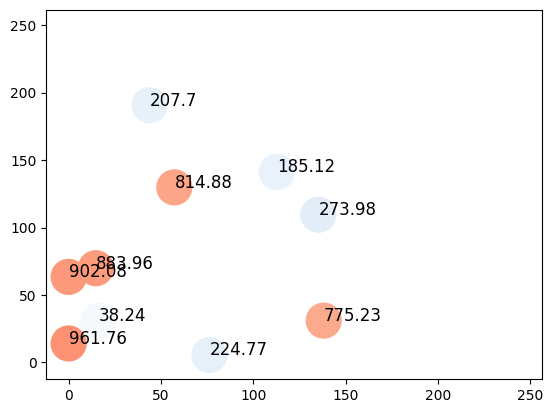

In [118]:
n = int(len(df_coordinates) * 0.90)
num_predators = 5
num_preys = 5

from celluloid import Camera

camera = Camera(plt.figure())
for i in range(len(df_rewards)-200,len(df_rewards)):
    x = df_coordinates[x_coord].loc[i]
    y = df_coordinates[y_coord].loc[i]
    r = df_rewards[reward_cols].loc[i]

    x_pred, y_pred, r_pred = (
        x[:num_predators],
        y[:num_predators],
        r[:num_predators]
    )
    x_prey, y_prey, r_prey = (
        x[num_predators:],
        y[num_predators:],
        r[num_predators:]
    )

    plt.scatter(x_pred, y_pred, c=[red_cmap(int((r + 1000) / 10)) for r in r_pred], s=200 * np.pi, marker="o")
    for i in range(len(x_pred)):
       plt.text(x_pred[i] + 0.1, y_pred[i], round((r_pred[i] + 1000), 2), fontsize=12)  # Offset x[i] for better readability
    #
    plt.scatter(x_prey, y_prey, c=[blue_cmap(int((r + 1000) / 10)) for r in r_prey], s=200 * np.pi, marker="o")
    for i in range(len(x_prey)):
       plt.text(x_prey[i] + 0.1, y_prey[i], round((r_prey[i] + 1000), 2), fontsize=12)  # Offset x[i] for better readability

    camera.snap()
anim = camera.animate(blit=True)
anim.save("scatter.mp4")

FileNotFoundError: [Errno 2] No such file or directory: '../main/resources/experiment_data/rewards1_0.csv'

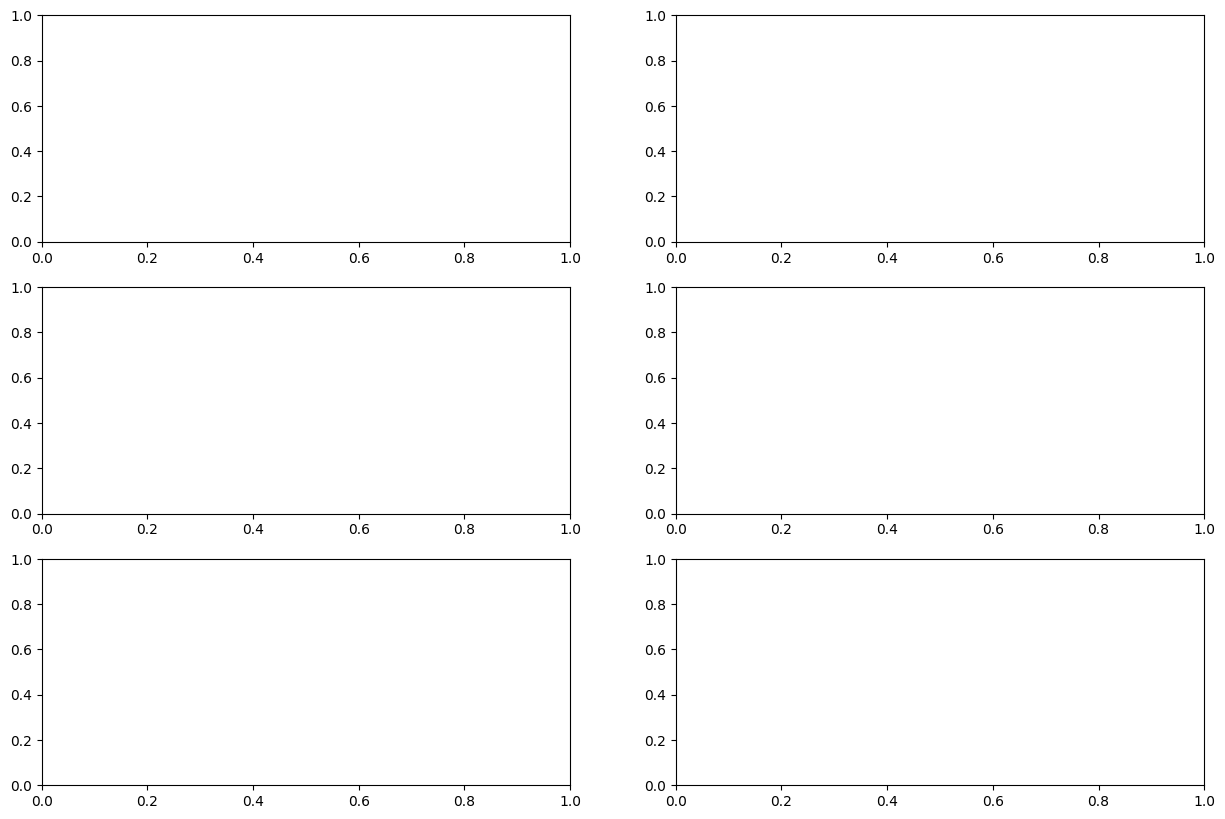

In [92]:
import numpy as np

fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()
reward_cols = ["r_10"]

for sim_id in range(5):
    rewards_path = f"../main/resources/experiment_data/rewards1_{sim_id}.csv"
    df_rewards = pd.read_csv(rewards_path)

    et_ref = 0
    k = [(0, True)]
    for i, et in enumerate(df_rewards["elapsed_time"]):
        if et < et_ref:
            last_k = k[len(k) - 1]
            k.append((i, np.abs(i - last_k[0]) + 1 == 50))
        et_ref = et

    axs[sim_id].set_title(f"{sim_id}")
    axs[sim_id].plot(
        [np.mean(df_rewards[reward_cols].loc[i]) for i in range(len(df_rewards))],
        marker="o",
    )
    for kk, f in k[1:]:
        axs[sim_id].axvline(x=kk, color="r" if f else "b", linestyle="--")

# Hide the last empty subplot (if any)
axs[-1].axis("off")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()